In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import seaborn as sns
import sys
import re
import os
from sklearn import feature_extraction
from glob import glob
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from func import*
%matplotlib inline

#### 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡

In [2]:
path = './NEWS/20*.txt'
title, data = readdir(path)
title


Number of files : 83


['2015-03-06 14_31',
 '2015-03-13 16_08',
 '2015-04-17 18_02',
 '2015-05-08 15_03',
 '2015-06-08 15_04',
 '2015-06-12 16_13',
 '2015-07-13 15_29',
 '2015-08-07 14_41',
 '2015-08-12 17_27',
 '2015-08-13',
 '2015-09-09 15_09',
 '2015-09-23',
 '2015-10-06 14_47',
 '2015-10-07',
 '2015-10-13 16_49',
 '2015-10-14',
 '2015-11-05 09_58',
 '2015-11-05',
 '2015-11-10 10_27',
 '2015-12-07 15_18',
 '2015-12-08',
 '2016-02-18 16_11',
 '2016-02-19',
 '2016-03-03 16_56',
 '2016-03-14',
 '2016-04-20',
 '2016-06-02 16_58',
 '2016-06-03 10_38',
 '2016-06-03 10_49',
 '2016-08-04 14_28',
 '2016-08-08 17_22',
 '2016-08-15',
 '2016-10-06 15_16',
 '2016-11-04 17_23',
 '2016-12-05 16_09',
 '2017-01-05 15_26',
 '2017-01-06',
 '2017-02-03',
 '2017-02-08 15_44',
 '2017-02-09',
 '2017-02-10',
 '2017-03-03 18_08',
 '2017-04-11 10_41',
 '2017-04-17',
 '2017-04-20 21_06',
 '2017-06-03',
 '2017-06-21 09_46',
 '2017-06-21',
 '2017-07-05 15_03',
 '2017-07-26',
 '2017-08-01 17_28',
 '2017-08-04 12_01',
 '2017-08-18 09_

#### 顯示部分資料內容

In [3]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 2015-03-06 14_31----
農曆春節出貨少 國巨
...
電子產品較為顯著。

----Document : 2015-03-13 16_08----
國巨去年全年每股稅後
...
業績進一步的成長。

----Document : 2015-04-17 18_02----
國巨首季EPS達1.
...
業績進一步的成長。

----Document : 2015-05-08 15_03----
國巨4月營收23.8
...
需求則較上月趨緩。

----Document : 2015-06-08 15_04----
國巨5月營收23.1
...
需求則較上月趨緩。

----Document : 2015-06-12 16_13----
國巨宣布買回庫藏股

...
場及全球資源整合。

----Document : 2015-07-13 15_29----
國巨6月營收22.3
...
需求則較上月趨緩。

----Document : 2015-08-07 14_41----
國巨7月合併營收22
...
需求則較上月趨緩。

----Document : 2015-08-12 17_27----
國巨上半年每股盈餘2
...
8元至69.9元。

----Document : 2015-08-13----
國巨上半年EPS2.
...
.8-69.9元。

----Document : 2015-09-09 15_09----
國巨8月營收 月增率
...
需求則較上月趨緩。

----Document : 2015-09-23----
國巨轉型 邁向車用高
...
、產品品質更優良。

----Document : 2015-10-06 14_47----
國巨9月營收24.8
...
需求則較上月趨緩。

----Document : 2015-10-07----
國巨9月營收月增5.
...
仍能「審慎樂觀」。

----Document : 2015-10-13 16_49----
國巨董事會宣佈實施庫
...
3-77.6元間。

----Document : 2015-10-14----
國巨買回3千萬股庫藏
...
3-77.6元間。

----Document : 2015-11-05 09_58-

#### 處理stopword

In [4]:
#stopwords = ['僅次', '像是', '價也', '價位', '價來', '價值法', '價值間', '價動作', '價又來', '價夯', '價對', '價收', '價是', '價格則', '價格會', '價款', '價潮', '價約', '價行動', '價車', '價開', '價飆', '億元並', '億元大關', '億元時', '億元業', '億元間', '優廠', '優良', '元之盈餘', '元成長', '元高點', '充射', '充市場', '充沛', '充電', '先問', '先知', '光是', '光靠', '入主', '入帳', '內國', '內國外', '內定', '內資', '內電', '全是', '全球排名', '全面性', '兩倍', '兩度', '兩檔個', '公司法', '公式', '公文', '公道', '共有', '共識', '其實國', '具市場', '具有', '再創', '再有', '再減', '再漲', '再發', '凱美及', '凱美大漲', '凱美處', '出亮麗', '出國', '出席', '出手', '出樂觀', '出貨動', '出貨少', '出貨較', '出路', '函給', '函給國', '分子', '分派', '分級', '分級制', '切入', '初建', '利僅', '利將', '利成長', '利比', '利狀況', '利用', '制量', '則來', '則專長', '則已', '則成長', '則是', '則樂觀', '則為', '則產生', '則維持', '則須', '則顯', '則高達', '前一天', '前妻', '前面', '剩下', '創佳績', '創單', '創新產品', '創歷史', '創造', '力新', '力行', '力量', '功率', '加乘', '加入', '加持', '加權', '助益', '努力', '動下', '勢力', '包袱', '包錢', '化生', '匯損', '匯率', '區春節', '千億', '千萬', '升息', '升級', '午盤', '半個', '半導', '卓怡君', '協助', '危險', '即使', '即日起', '即時', '原來', '原標準', '去年底', '參加', '參與', '及亞', '及凱美', '及員工', '及大中華', '及會計', '及產品', '及產業', '反彈', '反觀', '反跌', '反轉', '取回', '受匯率', '受大', '另國', '另外', '另處', '可依', '可圈', '可多', '可拿來', '可期', '可見', '可達', '可高達', '可點', '台勝科', '台林', '台灣產業', '台灣資', '台達電', '司法', '各個', '各大', '各產業', '各種', '各經', '合成', '合計', '合適', '同業會', '同集團', '名嘴', '品和高容型', '員工', '哪些', '商均', '商店', '商華', '商轉', '商願意', '問會', '問題', '喊漲', '喊話', '單一產品', '單季營', '單將', '單拉台', '單支', '單樂', '單滿', '單看', '嚴重', '四個', '四年', '四望', '四起', '回到', '回升', '回吐', '回檔', '回流', '回溫', '回補', '因中國', '因國', '因大', '因客戶', '因庫', '因應', '因現', '因環保', '因產品', '因而', '國內外', '國外', '國巨上', '國巨今', '國巨分別', '國巨則將', '國巨同', '國巨宣', '國巨對', '國巨成長', '國巨捐', '國巨擁', '國巨攻', '國巨是', '國巨有', '國巨朝', '國巨減', '國巨漲', '國巨為', '國巨營', '國巨現', '國巨的孫', '國巨竟', '國巨累計', '國巨罕', '國巨自', '國巨要', '國巨訂', '國巨賣', '國巨逆勢', '國泰證期', '國的', '國益', '團不一樣', '團不謀', '團全', '團將針', '團就', '團帶', '團版圖', '團的', '團財務', '團跟', '團透過', '團隊', '在手', '地址', '地方', '地步', '地震', '型產能', '型車', '執行長', '基地', '基本', '基金', '堅強', '報價漲', '報時', '報紙', '報載', '場及', '場比較', '場穩定', '增幅', '增產效', '壞事', '士亨興業', '外界', '外資圈', '外資期', '外資賣', '多久', '多出', '多小漲', '多次', '多頭', '大中華及', '大事', '大吐槽', '大單', '大型', '大指', '大方', '大毅', '大毅科', '大環境', '大聯盟', '大股', '大議價', '大賣', '大關', '大集', '天則', '太擔', '太陽能', '太高', '奉告', '套給', '好奇', '好威風', '好消息', '如凱美', '如同', '如國', '如國際', '姑且', '媒體', '存在', '季供', '季單季', '季在', '季增率', '季奇力', '季將', '季底', '季度', '季是', '季末', '季業績', '季淨利', '季淨利則', '季減', '季自', '季跟進', '季進入', '季還', '季還會', '孰料', '學習', '完全', '完整', '完美', '定論', '家園', '容易', '容質', '寂寞', '實力', '實在', '實收', '實質', '審慎', '寫下', '封關', '封面', '將上', '將以', '將來', '將再', '將從', '將成', '將拉開', '將提', '將擴產', '將攸關', '將是', '將會', '將有', '將減產', '將減資', '將為', '將產業', '將發放', '將穩定', '將等', '將舉', '將討論', '將退', '將達', '將陸續', '專心', '專戶', '專業', '尋好', '尋求', '對後市', '對營', '對產業', '對華', '對象', '導入', '導致', '小型', '小型化', '小漲', '小而美', '小跌', '小金', '少且', '尖端', '尚無減', '就將', '就算', '就要', '局中國', '居次', '展出', '展現', '層樓', '層級', '崇越', '工作日', '工廠', '工控', '工業用', '工認', '巨僅', '巨兩度', '巨在', '巨多層', '巨子', '巨對', '巨已', '巨應', '巨持續', '巨接', '巨早', '巨漲', '巨營', '巨發行', '巨發起', '巨股', '巨調', '巨資本額', '巨還', '巨開罰', '差異', '差距', '差額', '已不遠', '已展現', '已晉級', '已有', '已朝車', '已立', '已處', '已通過', '已降', '市佔率', '市場則', '市持續', '布局', '布建', '師進', '帳面', '帶來', '帶動業績', '帶動類', '常有', '幣與電', '幣驟', '年初', '年增', '年線', '幾件', '幾家', '幾日', '庫藏', '廠區', '廠將', '廠接', '廠旺詮', '廠營', '廠盛群', '廠華', '廠近', '廠飛', '建廠', '建漢', '引擎', '引領', '張是', '強悍', '強項', '影線', '很多', '很巧', '很險峻', '得樂觀', '徘徊', '從前', '從區域', '循環', '微型', '微增', '微幅', '微控制器', '心理', '心知肚明', '心紅色', '必要性', '忍不住', '快速', '恍然大悟', '恐將', '恐延長', '情況', '惟累計', '想想看', '意外', '意用', '感測', '態勢', '應介', '應以', '應依', '應可繳', '應商', '應將', '應會', '應比', '應給', '應計入', '成多', '成後才', '成本', '成熟期', '成現', '成立', '或是', '或者', '截止日', '所得', '所派', '所謂', '手機料', '手級', '手給', '打國際', '打臉', '扮演', '扼流器', '技嘉', '技術門檻', '技術面', '把握', '投信', '拖累', '拿下', '指定', '指數', '指數漲', '指期', '指紋', '挑戰約', '捐款', '捧上天', '捧國', '授予', '掌控', '掌握', '排名', '排組', '排行', '排阻', '採取', '採用', '採訪', '接下', '接厚膜', '接著', '控管', '提到', '提早到', '插電式', '損失還', '損益表', '搭上', '撐盤', '撤銷', '擁有', '操作', '操縱', '擔心', '據凱美', '擠入', '擬定', '擴增產能', '擴產以', '擴產計劃', '攀高', '收僅', '收到', '收則', '收可上', '收均', '收小增', '收持續', '收月減', '收有', '收盤價', '收續', '收續揚', '收表現', '收資本額', '收長', '改寫', '改選', '攻上', '放空', '政府', '政策', '故事', '故此', '效果', '效率', '救助金', '救援', '散戶', '整個國', '整整', '整營', '整齊', '數倍', '數創', '數廠', '文件', '料號', '新不僅', '新以', '新傳', '新將', '新年', '新廠', '新應用', '新技術', '新機種', '新款', '新紀錄', '新聞', '新能', '新訂', '新近', '新集', '方向', '方式', '方面', '於屬', '日以', '日凱', '日到', '日及', '日台', '日同', '日圓', '日外', '日將', '日現', '日當', '日盤', '日經', '日線', '日舉行', '日調', '日逆勢', '日還', '日針', '日開', '日電貿', '明內容', '明眼人', '春天', '春節', '昨公', '昨收', '昨發', '是不是', '時候', '時必會', '時榮成', '時點', '晉級', '晉身', '普通股', '普遍', '晶圓供', '晶電', '智寶會', '智寶約', '智寶股價', '暗示', '暫定', '暫時', '暴增', '曠課', '更受', '更達', '更釋', '替代', '替代品', '最後沒', '最為', '最看', '最近', '會中', '會繼續', '月售價', '月將', '月底', '月減', '有力', '有外', '有失', '有如', '有強', '有心人', '有成', '有效', '有望', '有用', '有趣', '有限', '服務', '朝向', '朝著', '朝車', '期則', '期間', '未來將', '未果', '未經', '本份', '本月', '本業佳', '本業營', '本波', '本益比', '本週', '李慧真', '材料', '村田', '杰美康', '東北亞', '東南亞', '東權益', '板卡', '果名', '架構', '柏光', '柏光則', '某些', '某檔', '柴油', '核對', '根據國', '根據村', '格外', '桌上型', '條全', '條規定', '條高階產品', '業主', '業務', '業界', '極調', '概念股', '概算', '榮成', '榮景', '榮景到', '榮聖', '標準', '機延', '機會續', '機產品', '機種', '機規格', '機關', '權人', '權值', '權外', '權數量', '權時', '次價格', '正文', '正隆', '此話', '歸屬', '殺價', '母雞', '每個', '每年', '每張', '比為', '比特', '比率', '水準', '水還', '江山', '江水', '決算表冊案', '沉寂已久', '沒暖時', '油源', '油電', '法人代表', '法規', '法說', '波則', '波是', '波漲價', '泰明', '泰銘則', '泰銘明', '泰銘會', '泰銘有', '活蹦', '海外基金', '消費型', '涉獵', '淨值', '淨外幣', '淨多單', '深度', '混合', '清楚', '減產', '減緩', '減資前', '減資動作', '減資後實', '減資後實施', '減資後約', '減資換', '減資潮', '減資金額', '測水溫', '準則', '溢價', '滿外', '滿足', '滿足點', '漂亮', '漲價潮', '漲價風', '漲到', '漲漲', '漲聲', '漲點', '漲齊漲', '災區', '災民', '為國', '為盈', '烏龍', '無人', '無可', '無法進', '無畏', '無線', '無論國', '焦點', '熱滾', '營及', '營所稅', '營收躍', '營運亮點', '營運動', '營運寫', '營運將', '營運會', '營運表現', '爆出', '爆發性', '爆量', '片狀', '牛頭', '牛頭領', '特斯拉', '特殊', '特殊技', '狀態', '狂飆', '獎應', '獨家', '獨董', '獲利上', '獲利大躍進', '獲利將', '獲利會', '獲利絕', '獲利績', '獲利者', '獲國際', '現兩者', '現合', '現大漲', '現紅盤', '現貨', '琢磨', '環保法規', '環境', '環球晶', '瓶頸', '甚佳', '生產線', '產品價', '產業國', '產業界', '用品', '用國', '用工', '用紙', '甩掉', '田中', '界傳', '留倉', '留意', '略微', '略減', '異動', '當地', '當天', '當天並', '當季', '當後盾', '當標題', '疏失', '疲弱', '登記', '發函給', '發展將', '發布', '發放金額', '發現', '發球', '發球權', '發股', '發言', '發言人', '百億元', '盛群', '監視', '盤堅', '盤後股', '盤桓', '盤面', '盤點', '直到', '直逼', '相對', '相當長', '相繼', '相關訂', '看佳', '看旺', '真是', '真的', '短線', '短缺', '矽晶圓', '矽晶圓類', '研發', '研究部', '砷化', '確定合', '碼國', '磁性', '示卡', '社會', '祭出', '科技股', '科產品', '稀釋', '稅前', '稅後', '稅後合', '稅後歸屬', '稅後盈餘年', '稅後盈餘為', '稅後盈餘達', '稅後稅後盈餘', '稅後純益', '稅費用', '稍微', '稱之為', '稽查', '積電', '穩健經', '穩步', '空間', '突出', '站上', '競價', '競市場', '符合', '第一天', '第三度', '第四', '第四季', '等泛', '答案', '算錯', '管理', '節奏', '範圍', '簽約', '籌碼', '籌碼面', '精兵', '精材', '精準', '精算', '精進', '系統', '紅包', '納資本', '純汽', '累積', '累計國', '細膩', '終場', '組件', '結束', '結果國', '結營', '給面', '經會', '經營', '經理', '經理人', '經給', '經衝', '經驗', '綜合', '網路', '網通及', '緊到', '緊品', '緊缺', '緩步', '縮減', '總數', '總經理', '總表', '繼台', '繼國', '繼奇力', '續僅', '續將', '續營', '缺貨到', '缺貨潮', '置評', '署名', '罷手', '美元', '美公開', '美國', '美國及', '美有', '美桀大漲', '美磊委買', '群組', '翻紅', '老路', '考慮', '而供', '而合', '而士', '而大中華', '而旺', '而車', '而門檻', '聚焦', '聞訊', '聯發科', '聯電', '股中', '股主導', '股價來', '股價則', '股價創', '股價收', '股價攻', '股受', '股大漲', '股市', '股帶', '股庫', '股息', '股懷', '股成', '股數', '股智邦', '股東們', '股稅後盈餘', '股表現', '股雙', '能維持', '臨門', '自中國', '自動', '自己', '自市', '自救', '自由', '自結', '自結營', '自華為', '自非手', '自駕車', '致使', '致力', '致稅後歸屬', '與華', '興業', '舉例', '舉行線', '舊產品', '舊產品則', '航太等', '航空', '良性', '花蓮', '花蓮救災', '花蓮縣', '若屬', '英特', '荷包', '華晶科', '華電子', '華電網', '萬口', '萬多張', '著大漲', '著華', '著說', '董座', '蓄勢', '藉以', '號公報', '號產品', '融資則', '行使', '行列', '行法', '衝上', '衝到', '衰國', '補一槍', '補課', '見圖', '見將', '規劃', '規產能', '視為', '覺得', '觀察國', '觀察外', '解套', '解讀', '解釋', '計入', '討論', '記者羅倩宜', '設置', '設計', '設計產業', '設計龍頭', '評價淨', '詮即', '詮營收', '該案', '詳述', '認事項', '認定', '認為國', '認為華', '認股', '認股權', '認證者', '認購', '認錯', '說外', '說明', '調到', '調升', '調查', '調降', '調高產品', '談國', '談產業', '請會', '請證', '講了', '謹慎', '證交所上', '證券', '議價', '議國', '議決', '變化', '負責', '財務強', '財會', '財經', '貢獻淨利', '貢獻約', '貨則', '貨動能', '貨持續', '貨源', '貨的', '買價', '買單', '資券', '資圈', '資大賣', '資後恢', '資換發', '資料', '資規劃', '資訊', '資賣', '資連續', '資針', '賑災', '賣壓', '賣給', '賣飛', '賺紅', '購光', '購大計', '購旺', '購版圖', '購計畫', '走低', '走勢', '走升', '走國', '走強', '走揚', '走高', '起調', '趁勢', '超逾千張', '越大', '趨嚴', '跌到', '跌齊', '距離', '距離還', '跨足', '車業', '車的', '車載', '車銷售', '軋空', '輪動', '轉佳', '轉單', '轉投資', '轉換', '轉機', '轉淡', '轉虧', '轉賣', '轉進', '辛苦', '辨識', '近尾聲', '近幾年', '近百', '追上', '追加', '逐季', '這一波', '這並', '這些', '這件', '這家', '這對', '這樣', '這次員', '這次國', '這筆', '這筆帳', '這筆業', '這與', '這跟', '這麼強', '通信', '造紙業', '連問會', '連袂', '連鋁質', '週三再', '週三會', '週五上', '週凱美', '週呈現', '週四', '週年', '週罕見', '週股', '週連續', '進一個', '進凱美', '進場', '進漲價', '進股', '進評', '進資本', '進駐', '逼近', '運動能', '運將', '運持續', '運有', '運狀況', '運算', '運算主機', '運體質', '過大', '過幾次', '過後外', '過會', '過配', '達成', '違規', '遜色', '遠高', '適逢農', '遭罰', '遵循', '選項', '避險', '邁向', '還不錯', '還了', '還可', '還好', '還將', '還建議', '還打', '還沒', '還沒來', '還沒到', '還沒有', '還繼續', '還股', '還說', '還說國', '那天', '那麼', '部位', '配息', '配股', '釋出', '重回', '重建', '重心', '重要', '量大增', '量測', '金山', '金融', '鈺邦', '鋁價大漲', '鋁箔', '鋸戰', '鋼鐵股', '鎖定', '開低', '開來', '開年', '開放', '開盤後國', '開紅盤', '開罰', '開資訊', '開高後即', '關心華', '關於國', '關注', '關聯度', '阻廠', '降低', '除國', '除經', '陸廠', '隔一個', '隔壁', '隨即', '隨後則', '隨著產業', '集團個', '雖然國', '雖然後來', '雙漲', '雞智', '難度', '難道', '零件', '電信', '電子展', '電容售價', '電容廠', '電容產品', '電感供', '電感類', '電拉尾盤', '電源', '電解電', '電話', '電集團', '需求面', '需照', '青紅燈', '非手', '韓廠', '順帶', '順應', '預估華', '預計國', '預計會', '頒給', '領下', '領導', '頭衝', '頻產品', '頻繁', '顆被', '類別', '類股', '顯然', '顯然國', '顯然會', '顯見國', '風範', '風華', '風華願', '風華高', '風險', '飆出', '飆破', '飛磁可', '飛磁賣', '飛磁賣給', '飛磁轉', '首次', '香港', '騷動', '驚艷', '體產業', '體質', '高價購', '高利', '高厚膜', '高售價', '高單', '高性能', '高技', '高效能', '高檔', '高漲', '高產品', '高速', '高階市場', '高階顯', '高頻', '鴻海', '鵬程', '黑手', '點只', '龍頭廠', '之出', '之前', '之合', '之用', '之路', '之際表現','不無關', '不知', '不至', '不行', '不認', '不過國', '且國', '並不會', '並且', '並加計', '並未', '並稱', '並通', '一件', '一位', '一半', '一城', '一天', '一年', '一提', '一斑', '一早', '一樣', '一次性', '一段', '一波', '一班', '一環', '一統', '一線', '一腳', '一舉', '一貫', '一開春', '一陣','一','二','三','四','五','六']
stopword = readdir('./stop_words.txt')[1][0].split('\r\n')
stopwords = ['不知', '不等','不至','並且', '並未', '並稱','中央社', '中小型', '中廠', '中心', '中環', '中芯', '中資','之內', '之前', '之用', '之稅', '之路', '之際', '乾坤', '事前', '事情', '事隔', '事項','什麼', '介於', '仍將', '仍會', '仍為', '仍然','以下', '以辦','但多數', '但是', '低容', '低容質', '佐銘', '何種','三星', '三次','一位', '一天', '一年', '一提', '一槍', '一段', '一統', '一舉', '一般型', '一貫', '一陣', '一頭霧水','一一', '一併', '一個', '一倍', '一半', '一城', '一季', '一定', '一家', '一席', '一早', '一樣', '一次性', '一班', '一環', '一線']
stopword+=stopwords
#test = ['僅是', '僅有', '僅次', '僅較', '價位', '價值', '價款', '億人', '億元並', '億元時', '億元間', '儘管', '優良', '充沛', '充電', '先知', '光是', '光靠', '入主', '入帳']
#stopword+=test
#stopwords = [ '之出', '之前', '之合', '之用', '之路', '之際表現','不無關', '不知', '不至', '不行', '不認', '不過國', '且國', '並不會', '並且', '並加計', '並未', '並稱', '並通', '一件', '一位', '一半', '一城', '一天', '一年', '一提', '一斑', '一早', '一樣', '一次性', '一段', '一波', '一班', '一環', '一統', '一線', '一腳', '一舉', '一貫', '一開春', '一陣','一','二','三','四','五','六']
#puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopword, puncs_Half])


Number of files : 1


In [5]:
stopword = readdir('./stopword.txt')[1][0].split('\r\n')
#stopword.append('\n')
#stopword[0:10]
#stopword+=c
#stopword
#savetofile('./stopword.txt', [stopword, puncs_Half])


Number of files : 1


In [6]:
#a = set(words)
#b=set(['股價','被動','元件','營收','產品','報導','今年','市場','表示','法人','報導','記者','同期','地區','上月','需求','產品','成長'])
#c=a-b
#c

In [7]:
jieba.set_dictionary('./dict.txt') # 繁體字詞庫
jieba.load_userdict("./dict_test.txt") # 自訂字詞庫
#jieba.analyse.set_stop_words('./stopword.txt') #自訂停止詞
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword)  and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Building prefix dict from C:\Users\j2831\Desktop\week_6\dict.txt ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.ua1d5f39c6ae371a91e186def75f6f93e.cache
Loading model cost 1.222 seconds.
Prefix dict has been built succesfully.


Number of word in document (2015-03-06 14_31) :  91
[('，', 10), ('月', 4), ('較', 4), ('營收', 4), ('國巨', 4), (' ', 3), ('地區', 3), ('2', 3), ('。', 3), ('\n', 3)]
Number of word in document (2015-03-13 16_08) :  158
[('，', 22), (' ', 12), ('成長', 8), ('後', 8), ('為', 8), ('去年', 8), ('較', 5), ('元', 5), ('、', 5), ('國巨', 5)]
Number of word in document (2015-04-17 18_02) :  179
[('，', 25), (' ', 12), ('成長', 8), ('。', 7), ('較', 6), ('國巨', 6), ('營業', 5), ('現金', 5), ('上季', 5), ('元', 5)]
Number of word in document (2015-05-08 15_03) :  80
[('，', 8), ('上月', 5), ('營收', 5), ('4', 4), ('。', 4), ('較', 4), ('成長', 3), ('月', 3), ('之', 3), ('及', 3)]
Number of word in document (2015-06-08 15_04) :  76
[('，', 8), ('上月', 5), ('營收', 5), ('月', 4), ('較', 4), ('5', 4), ('地區', 3), ('成長', 3), ('。', 3), ('需求', 3)]
Number of word in document (2015-06-12 16_13) :  148
[('，', 16), ('買回', 6), ('國巨', 6), ('及', 6), ('、', 5), ('為', 5), ('。', 4), ('元', 4), ('每股', 3), ('現金', 3)]
Number of word in document (2015-07-13 15_29) :  

Number of word in document (2017-11-16) :  202
[('，', 25), ('月', 10), ('國巨', 8), ('1', 6), ('MLCC', 6), ('15', 5), ('（', 5), ('）', 5), ('個', 5), ('。', 5)]
Number of word in document (2017-11-20) :  234
[('，', 36), ('國巨', 13), ('月', 10), ('。', 9), ('MLCC', 8), ('被動', 7), ('元件', 6), ('元', 6), ('（', 5), ('）', 5)]
Number of word in document (2017-11-22 11_10) :  160
[('，', 21), ('國巨', 7), ('月', 6), ('元', 6), (' ', 5), ('（', 5), ('～', 5), ('）', 5), ('1', 5), ('3', 4)]
Number of word in document (2017-12-05 09_39) :  154
[('，', 15), (' ', 10), ('月', 4), ('而', 4), ('、', 4), ('營收', 4), ('元', 4), ('300', 3), ('。', 3), ('（', 3)]
Number of word in document (2017-12-05 16_44) :  159
[('，', 23), ('月', 11), ('營收', 10), ('及', 7), ('成長', 6), ('11', 6), ('奇力新', 6), ('3', 5), ('、', 5), ('％', 4)]
Number of word in document (2017-12-20) :  202
[('，', 32), ('、', 11), ('MLCC', 8), ('國巨', 7), ('。', 6), ('元', 6), ('元件', 5), ('）', 5), ('產能', 5), ('年', 5)]
Number of word in document (2017-12-25) :  203
[('，', 2

In [8]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 2015-03-06 14_31----

----Document : 2015-03-13 16_08----

----Document : 2015-04-17 18_02----

----Document : 2015-05-08 15_03----

----Document : 2015-06-08 15_04----

----Document : 2015-06-12 16_13----

----Document : 2015-07-13 15_29----

----Document : 2015-08-07 14_41----

----Document : 2015-08-12 17_27----

----Document : 2015-08-13----

----Document : 2015-09-09 15_09----

----Document : 2015-09-23----

----Document : 2015-10-06 14_47----

----Document : 2015-10-07----

----Document : 2015-10-13 16_49----

----Document : 2015-10-14----

----Document : 2015-11-05 09_58----

----Document : 2015-11-05----

----Document : 2015-11-10 10_27----

----Document : 2015-12-07 15_18----

----Document : 2015-12-08----

----Document : 2016-02-18 16_11----

----Document : 2016-02-19----

----Document : 2016-03-03 16_56----

----Document : 2016-03-14----

----Document : 2016-04-20----

----Document : 2016-06-02 16_58----

----Document : 2016-06-03 10_38----

----Document : 201

In [9]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 2015-03-06 14_31
農曆 春節 出貨 少   國巨 2 月 營收 月減率 28.7% 
 2015 - 03 - 06 ... 上月 趨緩 ， 其中以 經銷商 通路 、 工業用 產品 及 消費性 電子 產品 較為 顯著 。 

document : 2015-03-13 16_08
國巨 去年 全年 每 股稅 後 盈餘 2.3 元   減資 後 5.78 元 
 2015 - 03...美 市場 及 整合 全球 資源 ， 以 強化 國際 競爭力 及 帶動 業績 進一步 的 成長 。 

document : 2015-04-17 18_02
國巨 首季 EPS 達 1.4 元   成長 18% 
 2015 - 04 - 17   18 :...品 研發 及 拓展 歐美 市場 ， 以 強化 國際 競爭力 並 帶動 業績 進一步 的 成長 。 

document : 2015-05-08 15_03
國巨 4 月 營收 23.84 億元   月減率 5.1% 
 2015 - 05 - 08   1...月 成長 ， 而 手機 通訊 及 消費性 電子 產品 及 EMS 之 需求 則較 上月 趨緩 。 

document : 2015-06-08 15_04
國巨 5 月 營收 23.1 億元   月減率 3.1% 
 2015 - 06 - 08   15... 成長 ， 而 消費性 電子 產品 、 工業用 產品 及 EMS 之 需求 則較 上月 趨緩 。 

document : 2015-06-12 16_13
國巨 宣布 買回 庫藏股 
 2015 - 06 - 12   16 : 13 
 〔 記者 張 慧...、 執行 既定 策略 、 創新 產品 研發 、 加速 拓展 歐美 市場 及 全球 資源 整合 。 

document : 2015-07-13 15_29
國巨 6 月 營收 22.39 億元   月減率 3.1% 
 2015 - 07 - 13   1...成長 ， 而 手機 通訊 、 經銷商 通路 及 電腦 相關 產品 之 需求 則較 上月 趨緩 。 

document : 2015-08-07 14_41
國巨 7 月 合併 營收 22.82 億元 ‏   月 成長率 1.9% 
 2015 - 08

In [10]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

In [11]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 2015-03-06 14_31
農曆 春節 出貨 少   國巨  月 營 ...  及 消費性 電子 產品 較為 顯著 

document : 2015-03-13 16_08
國巨 去年 全年 每 股稅 後 盈餘   ... 力 及 帶動 業績 進一步 的 成長 

document : 2015-04-17 18_02
國巨 首季  達  元   成長     ... 力 並 帶動 業績 進一步 的 成長 

document : 2015-05-08 15_03
國巨  月 營收  億元   月減率   ... 品 及  之 需求 則較 上月 趨緩 

document : 2015-06-08 15_04
國巨  月 營收  億元   月減率   ... 品 及  之 需求 則較 上月 趨緩 

document : 2015-06-12 16_13
國巨 宣布 買回 庫藏股         ... 展 歐美 市場 及 全球 資源 整合 

document : 2015-07-13 15_29
國巨  月 營收  億元   月減率   ... 關 產品 之 需求 則較 上月 趨緩 

document : 2015-08-07 14_41
國巨  月 合併 營收  億元    月 ... 子 產品 之 需求 則較 上月 趨緩 

document : 2015-08-12 17_27
國巨 上半年 每股 盈餘  元   宣布 ... 區間 價格 為 新臺幣  元至  元 

document : 2015-08-13
國巨 上半年  元         記者 ... 日  買回 區間 價格 為    元 

document : 2015-09-09 15_09
國巨  月 營收   月增率       ... 商 通路 之 需求 則較 上月 趨緩 

document : 2015-09-23
國巨 轉型   邁向 車用 高端 市場  ... 夠 更 精進  產品 品質 更 優良 

document : 2015-10-06 14_47
國巨  月 營收  億   月增率    ... 機 通訊 之 需求 則較 上月 趨緩 

document : 2015-10-07
國巨  月 營收 月增          ... 明年 

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '第季', '仍將', '低容', '仍然', '但是', '一位', '一頭霧水', '"', '一季', '不知', '第號', '國際', '中心', '中芯', '年度', '資產', '@', '仍為', '民國', '一定', '有限公司', '一倍', '之內', '取得', '[', '一城', '什麼', '可能', '集團', '一個', '?', '三星', '其他', '綜合', '\\', '合約', '不至', '的', '企業', '低容質', '一統', ';', '成本', '~', '億元', ',', '一早', '收入', '三次', '公司', '一半', '之稅', '並稱', '之前', '&', '解釋', '|', '>', '不等', '之際', '}', '中央社', ':', '財務報導', '股份', '一般型', '一席', '=', '一家', '一次性', '一環', '一貫', '!', '並且', '工具', '仍會', '一舉', '張慧雯', '中小型', ')', '之路', '事情', '+', '費用', '中資', '何種', '<', '一樣', '以辦', '(', '一段', '{', '一槍', '今日', '一線', '#', '一提', '乾坤', '.', '之用', '介於', '^', '-', '佐銘', '中廠', '準則', '事前', "'", '一班', '%', '包含', '$', '為元', '一年', '以下', ']', '支付', '事項', '一陣', '一併', '並未', '*', '但多數', '/', '一一', '負債', '中環', '事隔', '_', '一天', '當現'})


In [13]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
print(tfidf_matrix.shape)

(83, 1091)


In [14]:
words = tfidf_vectorizer.get_feature_names()
#print(words[0:50])
print(words)

['三大', '上升', '上午', '上影線', '上揚', '上櫃', '上游', '上課', '不予置評', '不停', '不再', '不小', '不差', '不得已', '不敗', '不易', '不景氣', '不漲', '不行', '不認', '不謀而合', '世界盃', '世界級', '中低', '主力', '主因', '主持', '主機', '主管', '互聯網', '亞系', '交代', '交換', '交換器', '交流', '亮點', '人員', '人民幣', '仔細', '代工', '以價制量', '企圖心', '企業家', '休息', '伺機', '作多', '併入', '使力', '使用量', '來談', '例如', '供應商', '供應給', '供應量', '供給面', '供貨', '供貨量', '依據', '依然', '保護', '修正', '俱樂部', '個案', '個體', '借力', '偏多', '偏重', '停工', '停止', '側目', '備料', '備貨', '僅是', '僅有', '僅次', '僅較', '價位', '價值', '價款', '億人', '億元並', '億元時', '億元間', '儘管', '優良', '充沛', '充電', '先知', '光是', '光靠', '入主', '入帳', '內定', '內資', '內部', '內部人', '全是', '全自動化', '全面性', '兩倍', '兩檔', '兩者', '公報', '公式', '公文', '公道', '共有', '共識', '具有', '冊案', '再下', '再減', '再現', '再發', '再補', '凱美及', '出售給', '出席', '出手', '出路', '分派案', '分級', '分級制', '切入', '利用', '到貨', '則上', '則以', '則多半', '則將', '則須', '前一天', '前一波', '前妻', '前幾年', '前面', '前高', '剩下', '創造', '力量', '功率', '加乘', '加入', '加持', '加權', '加計', '助益', '努力', '動到', '勢力', '包袱', '化鎵', '匯損', '升息', '升級', '升至', '午盤', '半個', '半導體廠', '卓怡君'

ValueError: DataFrame constructor not properly called!

In [114]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data=pd.DataFrame(np.transpose(np.array(data)))
#data=data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.353553,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



f, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation of Documents', fontsize = 13)
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [38]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data.values)
data_std

array([[-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153,  9.05538514,  9.05538514, ..., -0.11043153,
        -0.11043153, -0.11043153],
       ...,
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153]])

In [39]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(data_std)
print(x_7d.shape)
print(x_7d)

(83, 7)
[[-7.32722721e-01 -6.44999127e-01 -5.04830863e-01 -5.59502750e-01
  -4.21451989e-01 -2.71354612e-03 -8.18069197e-01]
 [-7.53561579e-01 -6.67455794e-01 -5.25588128e-01 -5.84034793e-01
  -4.41693669e-01 -3.02920958e-03 -8.59925803e-01]
 [-7.99010454e-01 -7.17414699e-01 -5.72683839e-01 -6.40150318e-01
  -4.88631872e-01 -4.01548242e-03 -9.58064719e-01]
 [-7.13005451e-01 -6.24005064e-01 -4.85649892e-01 -5.36946257e-01
  -4.02986381e-01 -2.46058556e-03 -7.80104381e-01]
 [-7.13005451e-01 -6.24005064e-01 -4.85649892e-01 -5.36946257e-01
  -4.02986381e-01 -2.46058556e-03 -7.80104381e-01]
 [-7.75620603e-01 -6.91533398e-01 -5.48123000e-01 -6.10811362e-01
  -4.63983355e-01 -3.43463836e-03 -9.06311778e-01]
 [-7.13005451e-01 -6.24005064e-01 -4.85649892e-01 -5.36946257e-01
  -4.02986381e-01 -2.46058556e-03 -7.80104381e-01]
 [-7.13005451e-01 -6.24005064e-01 -4.85649892e-01 -5.36946257e-01
  -4.02986381e-01 -2.46058556e-03 -7.80104381e-01]
 [-7.87141554e-01 -7.04236461e-01 -5.60137280e-01 -6.251

In [40]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(data_std)
x_4d.shape

(83, 7)

In [77]:

print(X_clustered.shape)
print(X_clustered)

(83,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


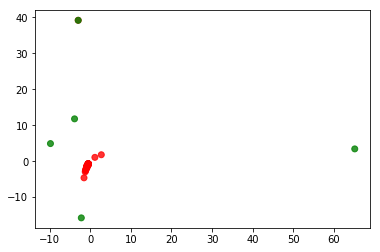

In [91]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)
#for i in range(0,82,3):
    #X_clustered[i]=1
    #continue
X_clustered[44]=1
X_clustered[73]=1
X_clustered[37]=1
X_clustered[69]=1
X_clustered[66]=1
X_clustered[40]=1
X_clustered[58]=0
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.scatter(x_4d[:,2],x_4d[:,6], c= label_color, alpha=0.8) 
plt.show()


0
1


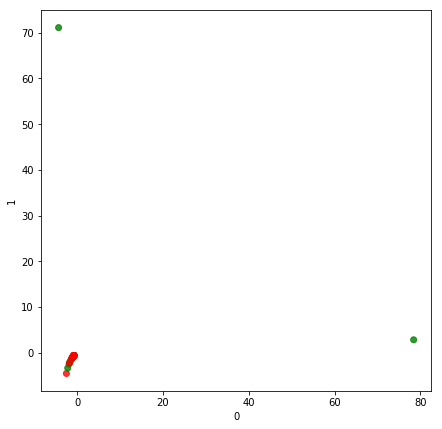

0
2


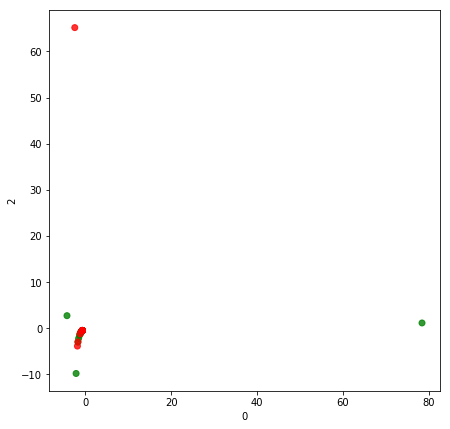

0
3


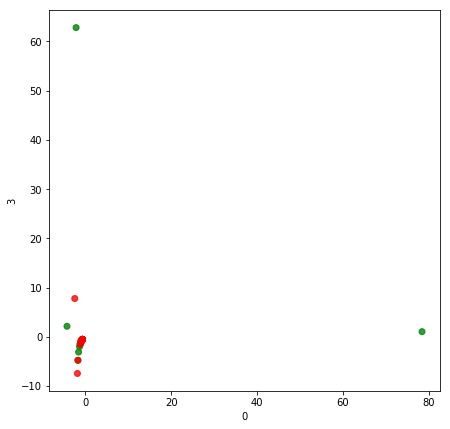

0
4


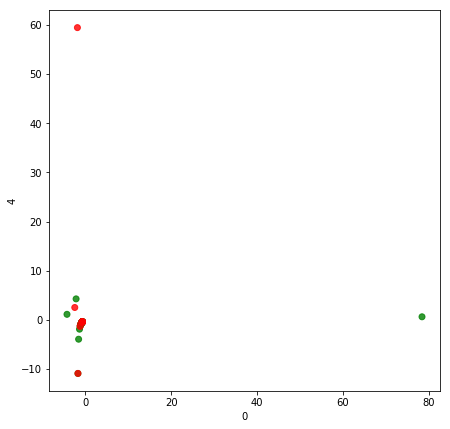

0
5


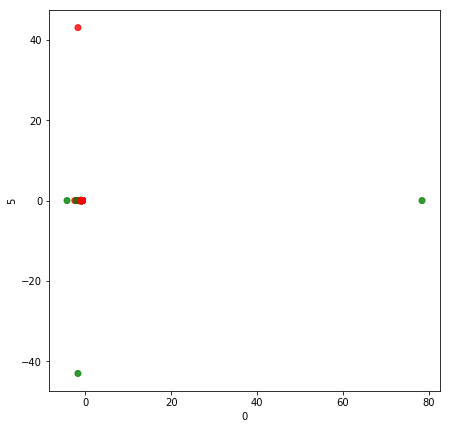

0
6


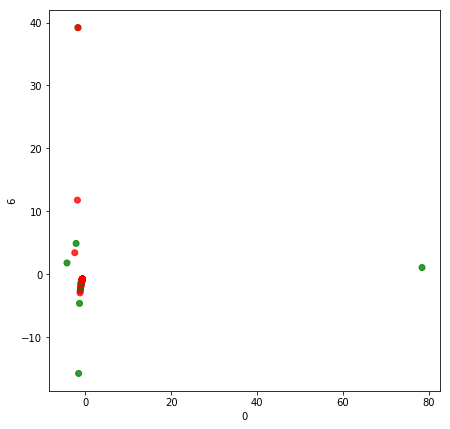

1
2


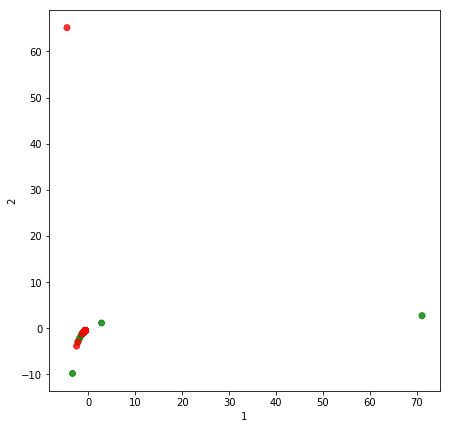

1
3


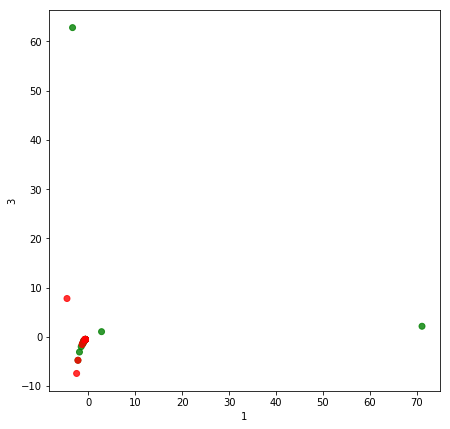

1
4


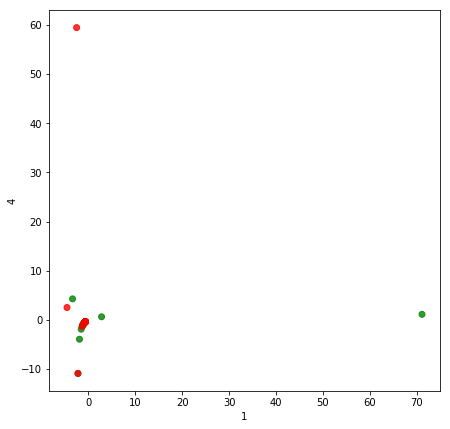

1
5


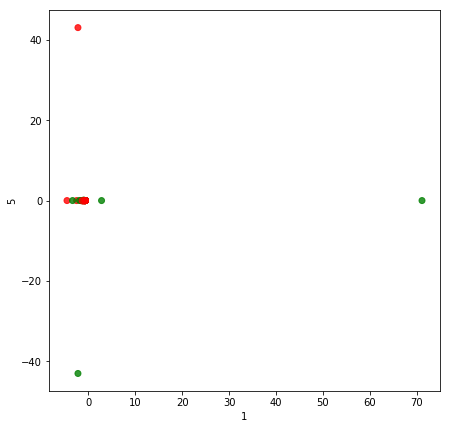

1
6


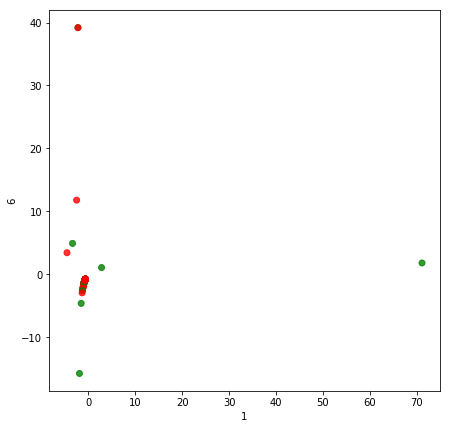

2
3


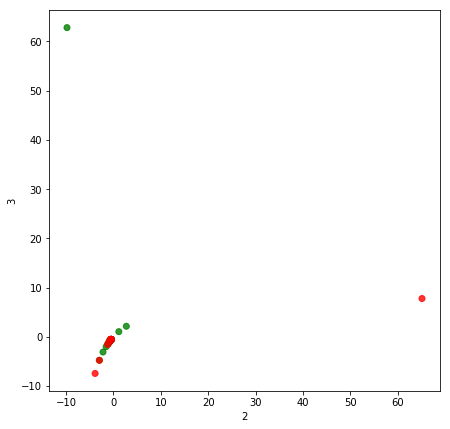

2
4


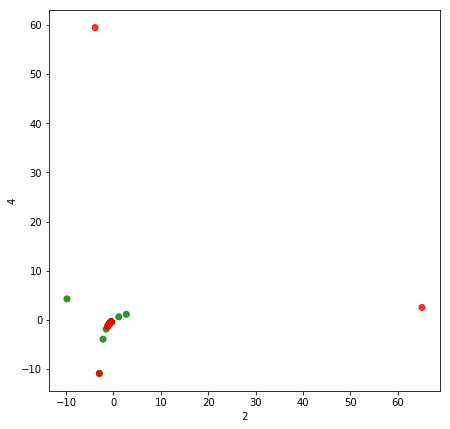

2
5


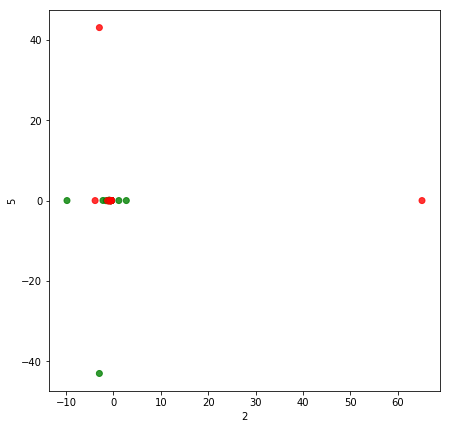

2
6


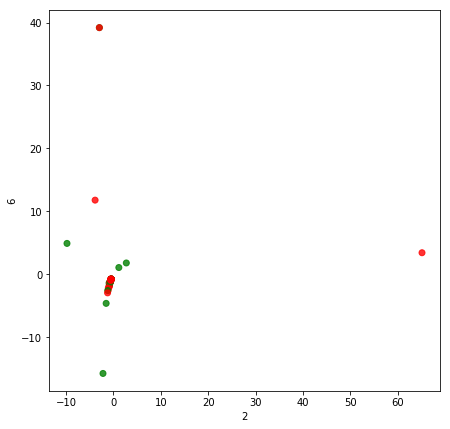

3
4


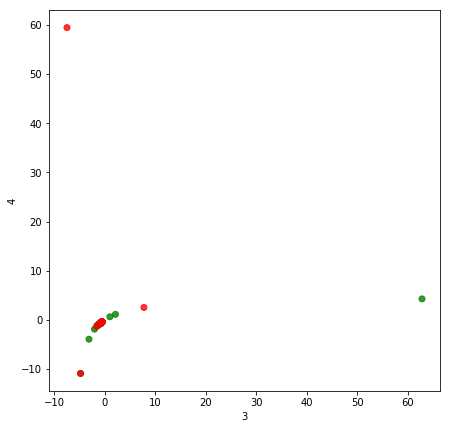

3
5


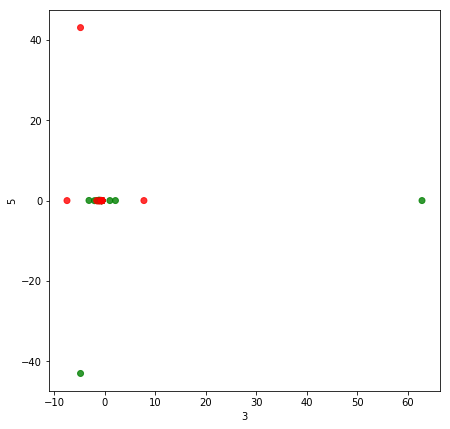

3
6


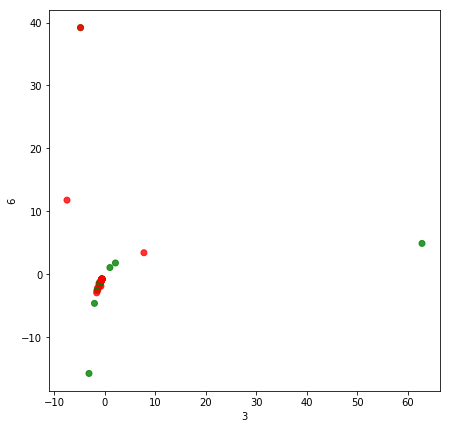

4
5


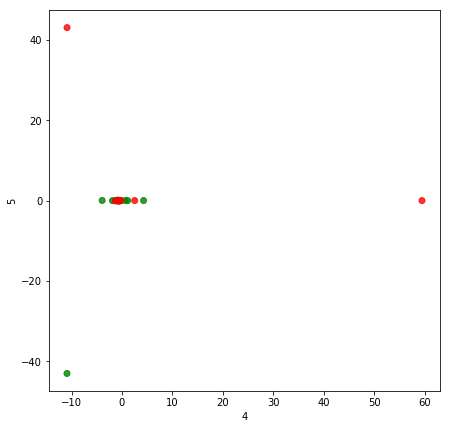

4
6


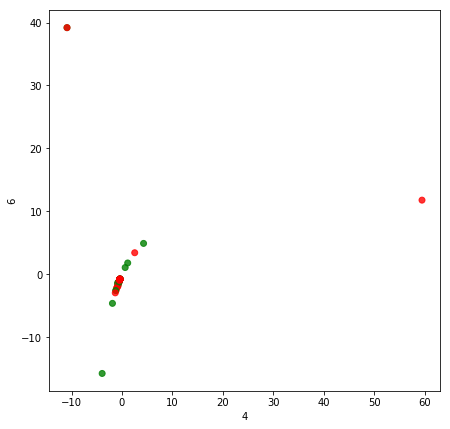

5
6


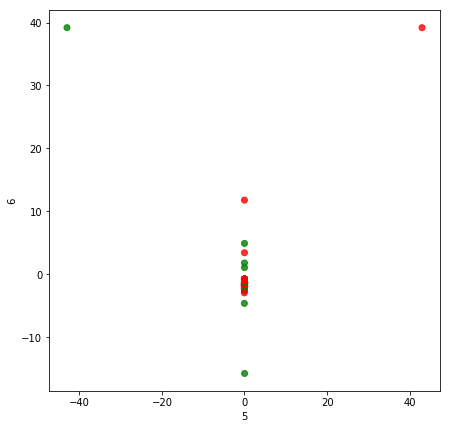

In [56]:
f=7
for i in range(f):
    for j in range(i,f):
        if(i==j):
            continue
        plt.figure(figsize = (7,7))
        print(i)
        print(j)
        plt.scatter(x_4d[:,i],x_4d[:,j], c= label_color, alpha=0.8) 
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

In [42]:
import plotly
plotly.tools.set_credentials_file(username='hank421.chen', api_key='A8OTqDBMym0e6rQjNe8I')

In [43]:
import plotly.plotly as py
import plotly.graph_objs as go

In [44]:
x_4d[:,3]

array([-0.55635412, -0.58059166, -0.63589108, -0.53404392, -0.53404392,
       -0.60701379, -0.53404392, -0.53404392, -0.62113854, -0.53404392,
       -0.53404392, -0.72018034, -0.53404392, -0.5682171 , -0.53404392,
       -0.53404392, -0.54497245, -0.53404392, -0.56821708, -0.53404392,
       -0.65140049, -0.53404392, -0.53404392, -0.53404392, -0.9993141 ,
       -0.65145369, -0.60701239, -0.82175095, -0.72671719, -0.53404392,
       -0.53404392, -0.70199498, -0.53404392, -0.53404392, -0.53404392,
       -0.53404392, -0.65138032, -7.4461438 , -0.7030771 , -2.00746441,
        7.77716768, -0.58059166, -0.63587349, -1.35465455, -0.54497245,
       -4.7642313 , -0.55635412, -0.66731251, -0.6513144 , -1.11786606,
       -0.55635412, -0.54497245, -0.74072306, -1.0422635 , -0.79275757,
       -0.54497245, -0.5682171 , -0.75719668,  1.0459247 , -0.62111551,
       -1.09065451, -0.55635412, -0.85892808, -0.849952  , -0.6358491 ,
       -0.8795296 , -3.09479029, -1.1768681 , -0.84710513, 62.80

In [45]:
x_4d[:,0]

array([-0.73277292, -0.75361578, -0.79907586, -0.71305222, -0.71305222,
       -0.77567931, -0.71305222, -0.71305222, -0.78720287, -0.71305222,
       -0.71305222, -0.86432983, -0.71305222, -0.74304817, -0.71305222,
       -0.71305222, -0.72277805, -0.71305222, -0.74304817, -0.71305222,
       -0.81130731, -0.71305222, -0.71305222, -0.71305222, -1.05318906,
       -0.81130402, -0.77567941, -0.94120122, -1.01640453, -0.71305222,
       -0.71305222, -0.85037464, -0.71305222, -0.71305222, -0.71305222,
       -0.71305222, -0.8113078 , -1.8709281 , -0.85039265, -1.3820897 ,
       -2.48507264, -0.75361578, -0.7990747 , -1.19552091, -0.72277805,
       -1.7475731 , -0.73277292, -0.82392855, -0.8113111 , -1.0498392 ,
       -0.73277292, -0.72277805, -0.87853845, -1.0122609 , -0.90872805,
       -0.72277805, -0.74304817, -0.89338385, 78.41438939, -0.78720306,
       -1.03504452, -0.73277292, -0.93995745, -0.95848343, -0.7990758 ,
       -0.95680114, -1.59035577, -1.11924713, -0.94123577, -2.17

In [110]:
import plotly.plotly as py
import plotly.graph_objs as go
x1=x_4d[:,2]
x1=x1[:24]
y1=x_4d[:,6]
y1=y1[:24]

x2=x_4d[:,2]
x2=x2[25:51]
y2=x_4d[:,6]
y2=y2[25:51]

x3=x_4d[:,2]
x3=x3[51:]
y3=x_4d[:,6]
y3=y3[51:]


In [113]:
time0 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x1,
    y=y1,
    mode="markers",
    text=title,
    hoverinfo='text'
)
time1 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x2,
    y=y2,
    mode="markers",
    text=title,
    hoverinfo='text'
)
time2 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x3,
    y=y3,
    mode="markers",
    text=title,
    hoverinfo='text'
)

data = [time0,time1,time2]

py.iplot(data, filename = 'basic-line')

In [90]:
for t in range(len(title)):
    if (title[t]=='2017-11-13'):
        print(t)

58


In [104]:
t = pd.DataFrame(title)
t[t[0]<'2017-08-18']

,0
0,2015-03-06 14_31
1,2015-03-13 16_08
2,2015-04-17 18_02
3,2015-05-08 15_03
4,2015-06-08 15_04
5,2015-06-12 16_13
6,2015-07-13 15_29
7,2015-08-07 14_41
8,2015-08-12 17_27
9,2015-08-13
